In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("SWaT_Dataset_Attack_v0.csv")
df2 = pd.read_csv("SWaT_Dataset_Normal_v0.csv")
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [3]:
df = df.rename(columns = {" Timestamp":"Timestamp", " MV101": "MV101", " AIT201":  "AIT201", " MV201": "MV201", " P201":"P201", " P202": "P202", " P204": "P204", " MV303": "MV303"})
# df = df.rename({"FIT101":"test", " MV101": "test2"}, axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      449919 non-null  object 
 1   FIT101         449919 non-null  float64
 2   LIT101         449919 non-null  float64
 3   MV101          449919 non-null  int64  
 4   P101           449919 non-null  int64  
 5   P102           449919 non-null  int64  
 6   AIT201         449919 non-null  float64
 7   AIT202         449919 non-null  float64
 8   AIT203         449919 non-null  float64
 9   FIT201         449919 non-null  float64
 10  MV201          449919 non-null  int64  
 11  P201           449919 non-null  int64  
 12  P202           449919 non-null  int64  
 13  P203           449919 non-null  int64  
 14  P204           449919 non-null  int64  
 15  P205           449919 non-null  int64  
 16  P206           449919 non-null  int64  
 17  DPIT301        449919 non-nul

In [4]:
#df2 head a
new_header = df2.iloc[0] #grab the first row for the header
df2 = df2[1:] #take the data less the header row
df2.columns = new_header #set the header row as the df header
df2 = df2.rename(columns = {" Timestamp":"Timestamp"})

In [5]:
df2.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
1,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
2,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
3,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
4,22/12/2015 4:00:03 PM,2.428338,260.285,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
5,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal


In [6]:
print("________________df.info()___________________")
print(df.info())

print("________________df2.info()___________________")
print(df2.info())
frames = [df2, df]
df3 = pd.concat(frames)

print("________________df3.info()___________________")
print(df3.info())
df3.head()

________________df.info()___________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      449919 non-null  object 
 1   FIT101         449919 non-null  float64
 2   LIT101         449919 non-null  float64
 3   MV101          449919 non-null  int64  
 4   P101           449919 non-null  int64  
 5   P102           449919 non-null  int64  
 6   AIT201         449919 non-null  float64
 7   AIT202         449919 non-null  float64
 8   AIT203         449919 non-null  float64
 9   FIT201         449919 non-null  float64
 10  MV201          449919 non-null  int64  
 11  P201           449919 non-null  int64  
 12  P202           449919 non-null  int64  
 13  P203           449919 non-null  int64  
 14  P204           449919 non-null  int64  
 15  P205           449919 non-null  int64  
 16  P206           449919 non-nul

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
1,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
2,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
3,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
4,22/12/2015 4:00:03 PM,2.428338,260.285,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
5,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal


In [7]:
# df3["Seconds"] = np.arange(len(df3))
df3.insert(0, "seconds", np.arange(len(df3)))
df3.head()

,seconds,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
1,0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
2,1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
3,2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
4,3,22/12/2015 4:00:03 PM,2.428338,260.285,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
5,4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal


In [8]:
# df3 = df3.drop(labels = ["FIT101"], axis=1)
df3 = df3.drop(columns = ["Timestamp"])
df3.head()

,seconds,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
1,0,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
2,1,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
3,2,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
4,3,2.428338,260.285,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal
5,4,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0,4.277749,0.000256304,1,1,1,Normal


In [9]:
df3.tail()

,seconds,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
449914,946714,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.1535,0.865024,189.022,0.0,1,1,1,Normal
449915,946715,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,Normal
449916,946716,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,Normal
449917,946717,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,Normal
449918,946718,2.501681,521.1196,2,2,1,168.0979,8.638683,301.9226,2.458206,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,Normal


In [10]:
df3.shape

(946719, 53)

In [11]:
# df = df.drop(labels = [1,2,3], axis=0)
# df = df.drop(labels = ["Date","Military","GMT +8","GMT +0", "Date/Time", "Where Attack", "Purpose Attack"], axis=1)
df3 = df3.drop([0])
df3 = df3.drop(labels = ["P202","seconds","P401", "P404", "P502", "P601", "P603"], axis=1)
df3.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602,Normal/Attack
1,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,2,...,0.001408992,0.001664373,0,1,10.02948,0,4.277749,0.000256304,1,Normal
2,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,2,...,0.001408992,0.001664373,0,1,10.02948,0,4.277749,0.000256304,1,Normal
3,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,2,...,0.001408992,0.001664373,0,1,10.02948,0,4.277749,0.000256304,1,Normal
4,2.428338,260.285,2,2,1,244.3284,8.19008,306.101,2.466536,2,...,0.001408992,0.001664373,0,1,10.02948,0,4.277749,0.000256304,1,Normal
5,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,2,...,0.001408992,0.001664373,0,1,10.02948,0,4.277749,0.000256304,1,Normal


In [12]:
df3 = df3.replace({'Normal': 0, 'Attack': 1, 'A ttack': 1})

In [13]:
df3 = df3.astype("float")

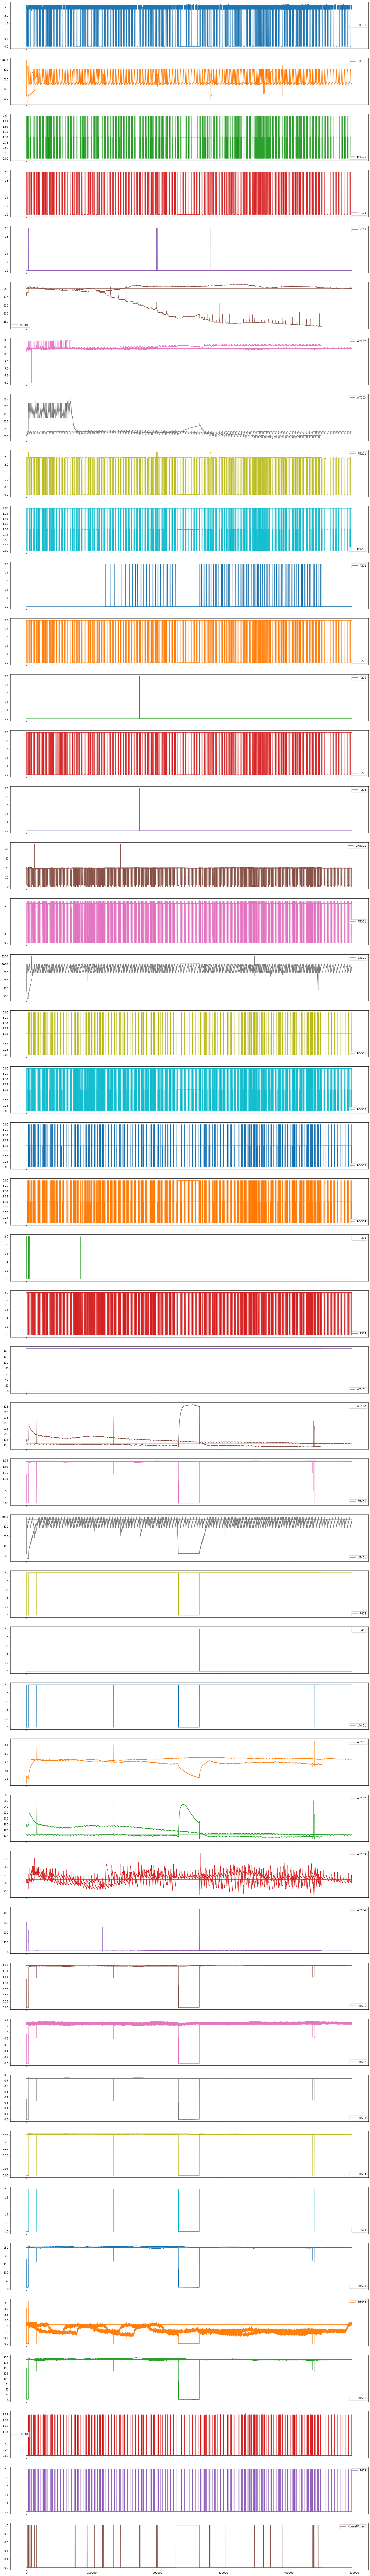

In [14]:
df3.plot(subplots=True, layout = (60, 1), figsize = (25, 4*60))
plt.show()

### Shapiro Wilk Test for Normalization, DF3

In [15]:
from scipy.stats import norm
from scipy.stats import shapiro

# If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
# If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution

for i in range(len(df3.columns)):
    print(str(df3.columns[i]))
    print(shapiro(df3.iloc[:,i]), "\n")

FIT101
ShapiroResult(statistic=0.6227624416351318, pvalue=0.0) 

LIT101
ShapiroResult(statistic=0.8265179395675659, pvalue=0.0) 

MV101
ShapiroResult(statistic=0.5903910398483276, pvalue=0.0) 

P101
ShapiroResult(statistic=0.5596831440925598, pvalue=0.0) 

P102
ShapiroResult(statistic=0.030233919620513916, pvalue=0.0) 

AIT201
ShapiroResult(statistic=0.7444114685058594, pvalue=0.0) 

AIT202
ShapiroResult(statistic=0.5674668550491333, pvalue=0.0) 

AIT203
ShapiroResult(statistic=0.5979254841804504, pvalue=0.0) 

FIT201


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.5766205787658691, pvalue=0.0) 

MV201
ShapiroResult(statistic=0.5745828747749329, pvalue=0.0) 

P201
ShapiroResult(statistic=0.24512755870819092, pvalue=0.0) 

P203
ShapiroResult(statistic=0.5653634667396545, pvalue=0.0) 

P204
ShapiroResult(statistic=0.0009867548942565918, pvalue=0.0) 

P205
ShapiroResult(statistic=0.5860604643821716, pvalue=0.0) 

P206
ShapiroResult(statistic=0.0009711384773254395, pvalue=0.0) 

DPIT301
ShapiroResult(statistic=0.5684067010879517, pvalue=0.0) 

FIT301
ShapiroResult(statistic=0.514072597026825, pvalue=0.0) 

LIT301
ShapiroResult(statistic=0.8195391893386841, pvalue=0.0) 

MV301
ShapiroResult(statistic=0.10374736785888672, pvalue=0.0) 

MV302
ShapiroResult(statistic=0.5301492214202881, pvalue=0.0) 

MV303
ShapiroResult(statistic=0.18327075242996216, pvalue=0.0) 

MV304
ShapiroResult(statistic=0.3188628554344177, pvalue=0.0) 

P301
ShapiroResult(statistic=0.020820319652557373, pvalue=0.0) 

P302
ShapiroResult(statistic=0.4852367

### Normalize Data, create DF4

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

## Normalize Data
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df3)
df4 = pd.DataFrame(x_scaled)
df4.columns = df3.columns

### Shapiro Wilk Test for Normalization, DF4

In [17]:
# If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
# If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution

for i in range(len(df4.columns)):
    print(str(df4.columns[i]))
    print(shapiro(df3.iloc[:,i]), "\n")

FIT101
ShapiroResult(statistic=0.6227624416351318, pvalue=0.0) 

LIT101
ShapiroResult(statistic=0.8265179395675659, pvalue=0.0) 

MV101
ShapiroResult(statistic=0.5903910398483276, pvalue=0.0) 

P101
ShapiroResult(statistic=0.5596831440925598, pvalue=0.0) 

P102
ShapiroResult(statistic=0.030233919620513916, pvalue=0.0) 

AIT201
ShapiroResult(statistic=0.7444114685058594, pvalue=0.0) 

AIT202
ShapiroResult(statistic=0.5674668550491333, pvalue=0.0) 

AIT203
ShapiroResult(statistic=0.5979254841804504, pvalue=0.0) 

FIT201
ShapiroResult(statistic=0.5766205787658691, pvalue=0.0) 

MV201


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.5745828747749329, pvalue=0.0) 

P201
ShapiroResult(statistic=0.24512755870819092, pvalue=0.0) 

P203
ShapiroResult(statistic=0.5653634667396545, pvalue=0.0) 

P204
ShapiroResult(statistic=0.0009867548942565918, pvalue=0.0) 

P205
ShapiroResult(statistic=0.5860604643821716, pvalue=0.0) 

P206
ShapiroResult(statistic=0.0009711384773254395, pvalue=0.0) 

DPIT301
ShapiroResult(statistic=0.5684067010879517, pvalue=0.0) 

FIT301
ShapiroResult(statistic=0.514072597026825, pvalue=0.0) 

LIT301
ShapiroResult(statistic=0.8195391893386841, pvalue=0.0) 

MV301
ShapiroResult(statistic=0.10374736785888672, pvalue=0.0) 

MV302
ShapiroResult(statistic=0.5301492214202881, pvalue=0.0) 

MV303
ShapiroResult(statistic=0.18327075242996216, pvalue=0.0) 

MV304
ShapiroResult(statistic=0.3188628554344177, pvalue=0.0) 

P301
ShapiroResult(statistic=0.020820319652557373, pvalue=0.0) 

P302
ShapiroResult(statistic=0.4852367639541626, pvalue=0.0) 

AIT401
ShapiroResult(statistic=0.313190

### Standardize, create DF5

In [18]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
type(df4)
df5 = scaler.fit_transform(df4)
type(df5)
df5 = pd.DataFrame(df5)
type(df5)
df5.columns = df4.columns
print(df5)

          FIT101    LIT101     MV101      P101      P102    AIT201    AIT202  \
0       0.590404 -2.675655  0.651732  0.621471 -0.057548  0.165293 -2.127171   
1       0.579126 -2.678795  0.651732  0.621471 -0.057548  0.165293 -2.127171   
2       0.563997 -2.680994  0.651732  0.621471 -0.057548  0.165293 -2.127171   
3       0.554369 -2.686018  0.651732  0.621471 -0.057548  0.165293 -2.127171   
4       0.551343 -2.689158  0.651732  0.621471 -0.057548  0.167946 -2.127171   
...          ...       ...       ...       ...       ...       ...       ...   
946713  0.667427 -0.611928  0.651732  0.621471 -0.057548 -1.939303  1.478820   
946714  0.658074 -0.605019  0.651732  0.621471 -0.057548 -1.939303  1.478820   
946715  0.642945 -0.602822  0.651732  0.621471 -0.057548 -1.939303  1.478820   
946716  0.634142 -0.602508  0.651732  0.621471 -0.057548 -1.939303  1.478820   
946717  0.617362 -0.599368  0.651732  0.621471 -0.057548 -1.939303  1.478820   

          AIT203    FIT201     MV201  .

### Shapiro Wilk Test for Normalization, DF5

In [19]:
# If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
# If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution

for i in range(len(df5.columns)):
    print(str(df5.columns[i]))
    print(shapiro(df3.iloc[:,i]), "\n")

FIT101
ShapiroResult(statistic=0.6227624416351318, pvalue=0.0) 

LIT101
ShapiroResult(statistic=0.8265179395675659, pvalue=0.0) 

MV101
ShapiroResult(statistic=0.5903910398483276, pvalue=0.0) 

P101
ShapiroResult(statistic=0.5596831440925598, pvalue=0.0) 

P102
ShapiroResult(statistic=0.030233919620513916, pvalue=0.0) 

AIT201
ShapiroResult(statistic=0.7444114685058594, pvalue=0.0) 

AIT202
ShapiroResult(statistic=0.5674668550491333, pvalue=0.0) 

AIT203
ShapiroResult(statistic=0.5979254841804504, pvalue=0.0) 

FIT201


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.5766205787658691, pvalue=0.0) 

MV201
ShapiroResult(statistic=0.5745828747749329, pvalue=0.0) 

P201
ShapiroResult(statistic=0.24512755870819092, pvalue=0.0) 

P203
ShapiroResult(statistic=0.5653634667396545, pvalue=0.0) 

P204
ShapiroResult(statistic=0.0009867548942565918, pvalue=0.0) 

P205
ShapiroResult(statistic=0.5860604643821716, pvalue=0.0) 

P206
ShapiroResult(statistic=0.0009711384773254395, pvalue=0.0) 

DPIT301
ShapiroResult(statistic=0.5684067010879517, pvalue=0.0) 

FIT301
ShapiroResult(statistic=0.514072597026825, pvalue=0.0) 

LIT301
ShapiroResult(statistic=0.8195391893386841, pvalue=0.0) 

MV301
ShapiroResult(statistic=0.10374736785888672, pvalue=0.0) 

MV302
ShapiroResult(statistic=0.5301492214202881, pvalue=0.0) 

MV303
ShapiroResult(statistic=0.18327075242996216, pvalue=0.0) 

MV304
ShapiroResult(statistic=0.3188628554344177, pvalue=0.0) 

P301
ShapiroResult(statistic=0.020820319652557373, pvalue=0.0) 

P302
ShapiroResult(statistic=0.4852367

### CUSUM

In [20]:
from __future__ import division, print_function
import warnings
import numpy as np

tai_list = []
def detect_cusum(x, threshold=0.3, drift=0.09, ending=False, show=True, ax=None):
    """Cumulative sum algorithm (CUSUM) to detect abrupt changes in data.
    Parameters
    ----------
    x : 1D array_like
        data.
    threshold : positive number, optional (default = 1)
        amplitude threshold for the change in the data.
    drift : positive number, optional (default = 0)
        drift term that prevents any change in the absence of change.
    ending : bool, optional (default = False)
        True (1) to estimate when the change ends; False (0) otherwise.
    show : bool, optional (default = True)
        True (1) plots data in matplotlib figure, False (0) don't plot.
    ax : a matplotlib.axes.Axes instance, optional (default = None).
    Returns
    -------
    ta : 1D array_like [indi, indf], int
        alarm time (index of when the change was detected).
    tai : 1D array_like, int
        index of when the change started.
    taf : 1D array_like, int
        index of when the change ended (if `ending` is True).
    amp : 1D array_like, float
        amplitude of changes (if `ending` is True).
 
    [1] Gustafsson (2000) Adaptive Filtering and Change Detection.
    """

    x = np.atleast_1d(x).astype('float64')
    gp, gn = np.zeros(x.size), np.zeros(x.size)
    ta, tai, taf = np.array([[], [], []], dtype=int)
    tap, tan = 0, 0
    amp = np.array([])
    # Find changes (online form)
    for i in range(1, x.size):
        """        
        # s is distance measure, s = (measurements up to t) - (measurements up to t-1)

        # alarm is given when the stopping rule has been met and theta has exceeded the threshold
        # gt is auxillary test statistic used for alarms using threshold. Alarm if gt = theta > h.
        
        # To prevent positive drifts, eventually yielding a false alarm, a small drift term v is subtracted at each time instant. 
        # To prevent a negative drift, which would increase the time to detection after a change, the test statistic is reset to 0 each time in becomes less than a negative constant a.
        """
        s = x[i] - x[i-1]
        gp[i] = gp[i-1] + s - drift  # cumulative sum for + change
        gn[i] = gn[i-1] - s - drift  # cumulative sum for - change
        if gp[i] < 0:
            gp[i], tap = 0, i
        if gn[i] < 0:
            gn[i], tan = 0, i
        if gp[i] > threshold or gn[i] > threshold:  # change detected
            ta = np.append(ta, i)    # alarm index
            tai = np.append(tai, tap if gp[i] > threshold else tan)  # start. index of when the change initiates.
            gp[i], gn[i] = 0, 0      # reset alarm


    if tai.size and ending:
        _, tai2, _, _ = detect_cusum(x[::-1], threshold, drift, show=False)
        taf = x.size - tai2[::-1] - 1
        # Eliminate repeated changes, changes that have the same beginning
        tai, ind = np.unique(tai, return_index=True)
        ta = ta[ind]
        # taf = np.unique(taf, return_index=False)  # corect later
        if tai.size != taf.size:
            if tai.size < taf.size:
                taf = taf[[np.argmax(taf >= i) for i in ta]]
            else:
                ind = [np.argmax(i >= ta[::-1])-1 for i in taf]
                ta = ta[ind]
                tai = tai[ind]
        # Delete intercalated changes (the ending of the change is after
        # the beginning of the next change)
        ind = taf[:-1] - tai[1:] > 0
        if ind.any():
            ta = ta[~np.append(False, ind)]
            tai = tai[~np.append(False, ind)]
            taf = taf[~np.append(ind, False)]
        # Amplitude of changes
        amp = x[taf] - x[tai]

    if show:
        _plot(x, threshold, drift, ending, ax, ta, tai, taf, gp, gn)
    
    print("change start indices",tai)
    tai_list.append(tai)
    return ta, tai, taf, amp

def _plot(x, threshold, drift, ending, ax, ta, tai, taf, gp, gn):
    """Plot results of the detect_cusum function, see its help."""
    
    print("-----------------------------------", str(df4.columns[j]), "-----------------------------------")
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
    else:
        if ax is None:
#             _, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
            _, (ax1) = plt.subplots(1, 1, figsize=(8, 6))

        t = range(x.size)
        ax1.plot(t, x, 'b-', lw=2)
        if len(ta):
            ax1.plot(tai, x[tai], '>', mfc='g', mec='g', ms=10,
                     label='Start')
            if ending:
                ax1.plot(taf, x[taf], '<', mfc='g', mec='g', ms=10,
                         label='Ending')
            ax1.plot(ta, x[ta], "s", mfc='r', mec='r', mew=1, ms=5,
                     label='Alarm')
            ax1.legend(loc='best', framealpha=.5, numpoints=1)
        ax1.set_xlim(-.01*x.size, x.size*1.01-1)
        ax1.set_xlabel('Seconds', fontsize=14)
        ax1.set_ylabel('Amplitude', fontsize=14)
        ymin, ymax = x[np.isfinite(x)].min(), x[np.isfinite(x)].max()
        yrange = ymax - ymin if ymax > ymin else 1
        ax1.set_ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
        ax1.set_title('CUSUM changes ' +
                      '(threshold= %.3g, drift= %.3g): # changes = %d'
                      % (threshold, drift, len(tai)))
        plt.tight_layout()
        plt.show()

----------------------------------- FIT101 -----------------------------------


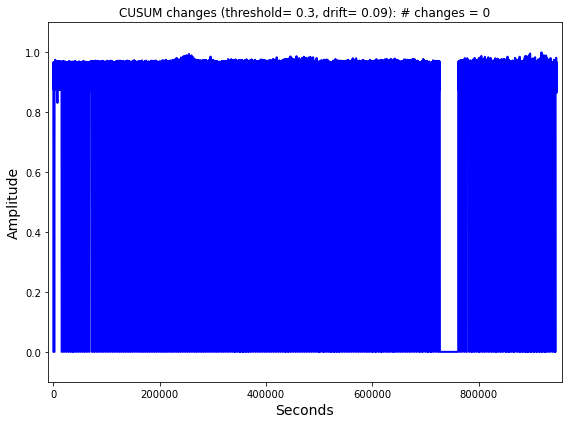

change start indices []
----------------------------------- LIT101 -----------------------------------


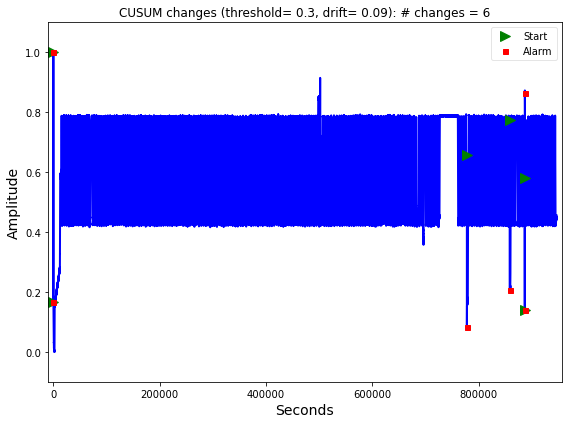

change start indices [   222    240 777983 858472 886544 887060]
----------------------------------- MV101 -----------------------------------


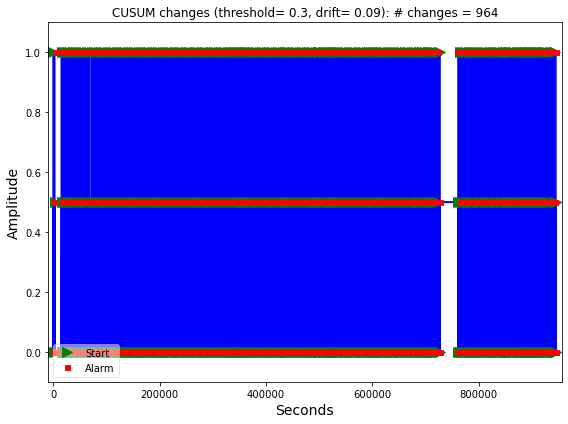

change start indices [   211    219   2400   2409  15581  15588  16456  16465  19665  19673
  21026  21034  24034  24042  25218  25227  28253  28262  29448  29457
  32441  32449  33639  33648  36354  36362  37034  37043  38163  38171
  38970  38978  41977  41986  43169  43177  46192  46200  47389  47397
  50395  50403  51577  51584  54559  54567  55756  55764  58686  58695
  59872  59881  62820  62828  64013  64023  66980  66988  68244  68252
  72490  72498  74106  74115  77098  77106  78283  78290  81354  81362
  82552  82560  85639  85648  86840  86848  89854  89862  91027  91036
  94036  94045  95230  95238  98254  98262  99441  99449 102468 102476
 103649 103657 106675 106684 107851 107859 110870 110878 112059 112068
 115067 115075 116234 116242 119222 119231 120402 120410 123391 123400
 124559 124567 127520 127529 128686 128694 131650 131658 132822 132832
 135802 135811 136980 136988 139917 139925 141088 141096 144046 144054
 145222 145231 148146 148154 149316 149324 152267 152276

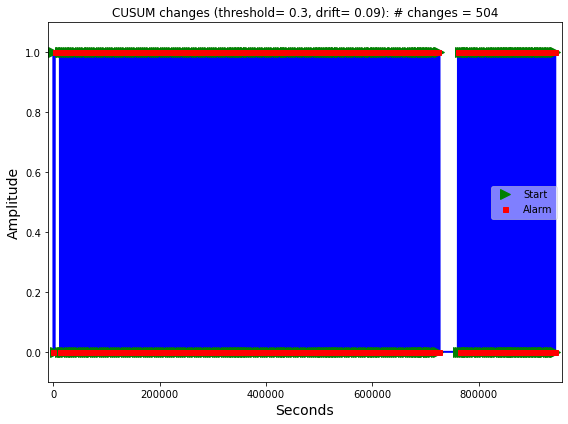

change start indices [   210   2673  12538  13073  15269  15798  18273  18815  19632  20370
  23460  24561  27678  28791  31870  32981  35776  36376  37539  38312
  41413  42515  45635  46729  49839  50920  54005  55098  58128  59218
  62253  63350  66423  67579  69725  70213  72456  73445  76543  77621
  80793  81888  85089  86180  89301  90372  93484  94571  97707  98776
 101917 102989 106121 107194 110336 111396 114520 115575 118682 119737
 122848 123901 126978 128029 131092 132164 135238 136322 139352 140427
 143487 144563 147590 148659 151709 152785 155868 156950 160029 161115
 164162 165247 168194 169273 172236 173312 176287 177368 180391 181475
 184539 185623 188703 189796 192848 193935 196990 198080 201144 202229
 205286 206379 209411 210488 213532 214620 217720 218803 221866 222961
 225998 227086 230118 231209 234241 235328 238366 239451 242489 243567
 246662 247753 250881 251959 255134 256210 259454 260543 263757 264842
 268055 269147 272349 273436 276610 277700 280889 281973

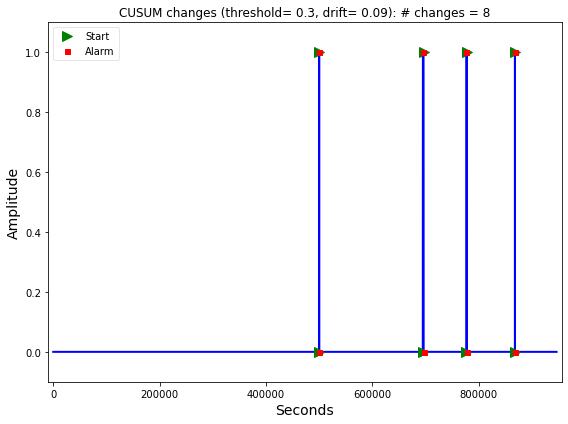

change start indices [499844 500289 695071 696514 776845 777983 868317 868416]
----------------------------------- AIT201 -----------------------------------


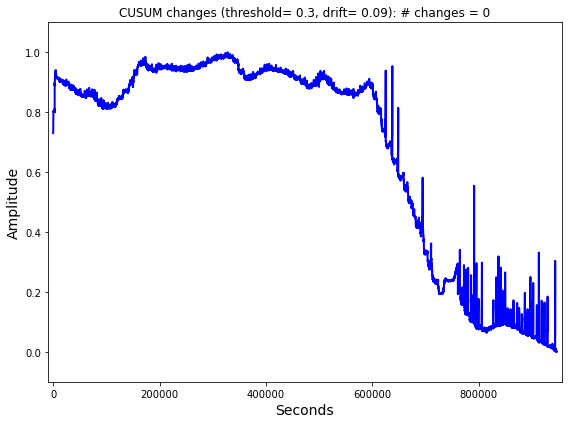

change start indices []
----------------------------------- AIT202 -----------------------------------


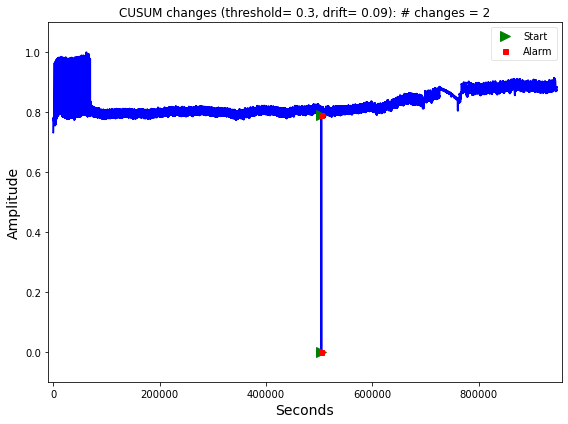

change start indices [504031 504230]
----------------------------------- AIT203 -----------------------------------


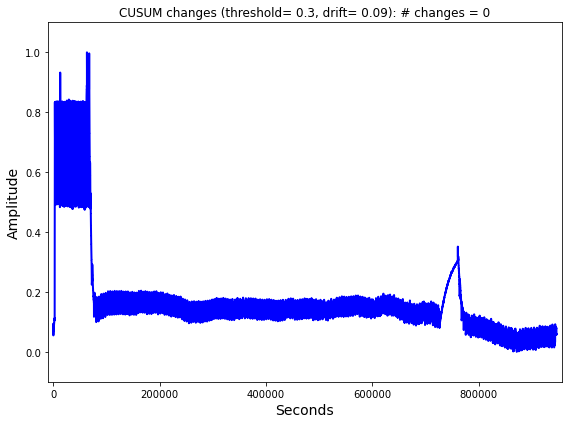

change start indices []
----------------------------------- FIT201 -----------------------------------


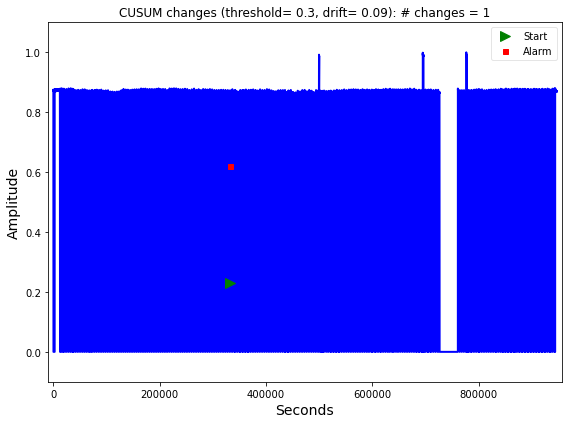

change start indices [332606]
----------------------------------- MV201 -----------------------------------


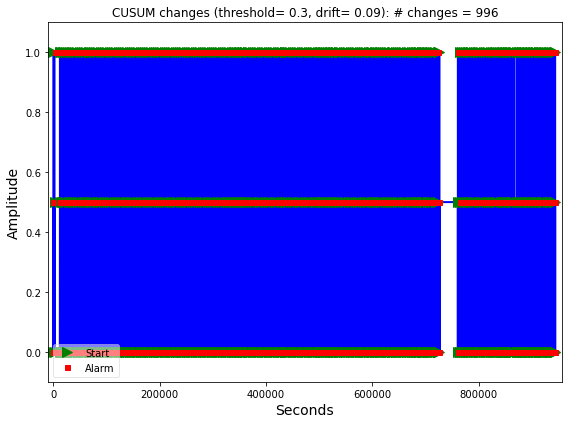

change start indices [   211    219   2400   2408  12540  12548  13066  13073  15270  15278
  15791  15798  18274  18281  18809  18815  19634  19641  20363  20370
  23461  23468  24554  24561  27680  27687  28782  28791  31871  31879
  32973  32980  35779  35786  36369  36376  37540  37548  38304  38312
  41414  41422  42508  42515  45637  45644  46722  46728  49840  49847
  50912  50920  54007  54014  55090  55098  58130  58137  59211  59218
  62255  62262  63342  63350  66425  66432  67572  67579  69726  69734
  70205  70212  72457  72464  73438  73445  76544  76552  77614  77621
  80795  80802  81881  81888  85090  85098  86171  86180  89303  89310
  90364  90372  93485  93493  94563  94571  97709  97716  98769  98776
 101919 101926 102982 102989 106123 106130 107186 107194 110337 110345
 111389 111396 114522 114530 115567 115575 118683 118691 119729 119737
 122849 122856 123893 123900 126980 126987 128021 128028 131094 131101
 132157 132164 135240 135247 136315 136322 139355 139362

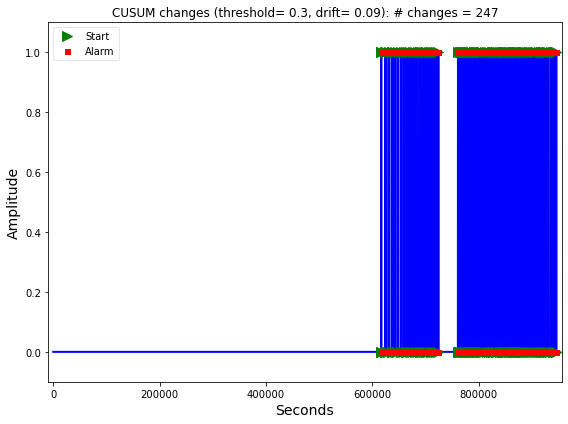

change start indices [616612 617135 617138 617141 624103 624219 625342 625667 630480 630899
 636452 636455 636486 636684 637797 637951 642184 642571 647351 647808
 653179 653827 658531 659027 663126 663333 666017 666627 671244 671728
 675414 676015 679953 680503 684595 685209 689445 689447 689452 690041
 693604 694068 697108 697677 700828 701452 701455 701459 705449 706229
 709629 710044 711770 712365 715517 716174 719546 720443 723911 724609
 761045 761748 763794 764225 765974 766421 767920 768063 768897 769416
 769421 769428 771458 771941 773766 774114 775225 775749 778132 778437
 779444 779773 782119 782907 782912 782917 785273 785318 785914 786608
 789437 790535 790540 790542 794245 794254 794260 794860 795978 796257
 796261 796264 796269 796279 798331 799187 802285 803024 805143 805149
 805153 805252 806377 807311 810694 811688 814987 815911 819312 820344
 823620 824492 826782 826785 826804 826817 827944 829014 832085 832472
 833194 833543 835467 836372 839828 840656 843326 843364

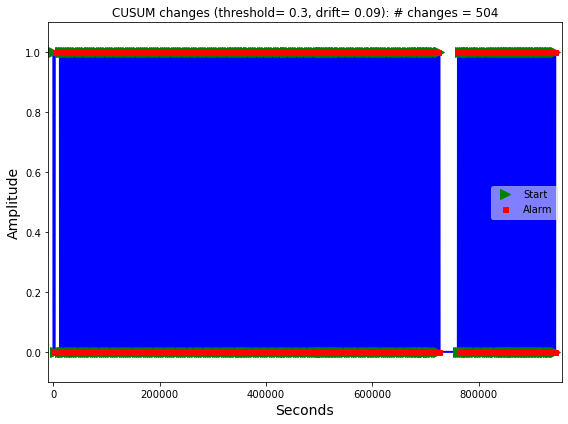

change start indices [   210   2682  12540  13082  15270  15807  18274  18825  19634  20379
  23461  24570  27680  28800  31871  32990  35779  36386  37540  38321
  41414  42525  45637  46738  49840  50929  54007  55108  58130  59228
  62255  63359  66425  67589  69726  70222  72457  73455  76544  77630
  80795  81898  85090  86189  89303  90381  93485  94580  97709  98785
 101919 102999 106123 107203 110337 111406 114522 115584 118683 119746
 122849 123910 126980 128039 131094 132173 135240 136331 139355 140436
 143489 144573 147592 148668 151711 152794 155869 156959 160030 161123
 164163 165256 168196 169283 172238 173322 176289 177378 180393 181484
 184541 185632 188705 189805 192850 193945 196991 198089 201145 202238
 205288 206388 209413 210497 213533 214630 217722 218813 221867 222970
 225999 227096 230120 231218 234243 235337 238367 239460 242491 243576
 246664 247762 250883 251968 255136 256219 259456 260552 263758 264851
 268057 269156 272352 273445 276612 277709 280891 281982

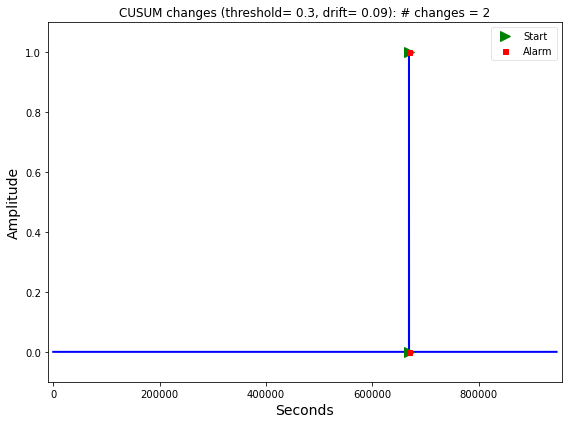

change start indices [669066 669122]
----------------------------------- P205 -----------------------------------


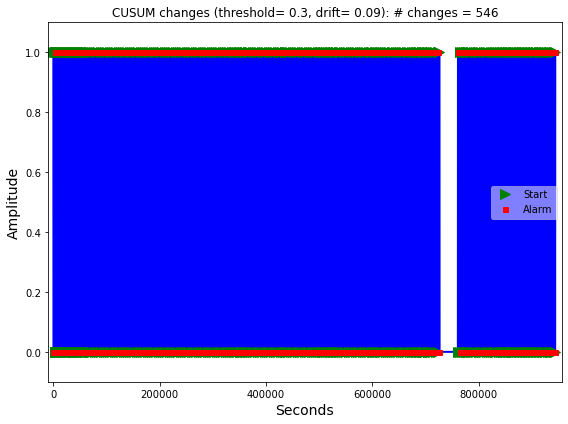

change start indices [   210   2682   3014   4125   4331   5520   5731   6935   7151   8343
   8559   9734   9953  11126  11353  12522  12540  14536  14777  16410
  16650  17880  18115  20379  20621  21826  22063  23193  23434  25402
  25647  26813  27057  29144  29396  30583  30835  32990  33242  34422
  34672  36386  36646  38321  38553  39728  39980  41073  41328  43307
  43569  44682  44945  46738  46972  48099  48362  49453  49718  51687
  51963  53092  53377  55448  55742  56858  57143  59228  59511  60617
  60900  61970  62251  64996  65307  66378  66425  69184  69726  70222
  72457  73455  76544  77630  80795  81898  85090  86189  89303  90381
  93485  94580  97709  98785 101919 102999 106123 107203 110337 111406
 114522 115584 118683 119746 122849 123910 126980 128039 131094 132173
 135240 136331 139355 140436 143489 144573 147592 148668 151711 152794
 155869 156959 160030 161123 164163 165256 168196 169283 172238 173322
 176289 177378 180393 181484 184541 185632 188705 189805

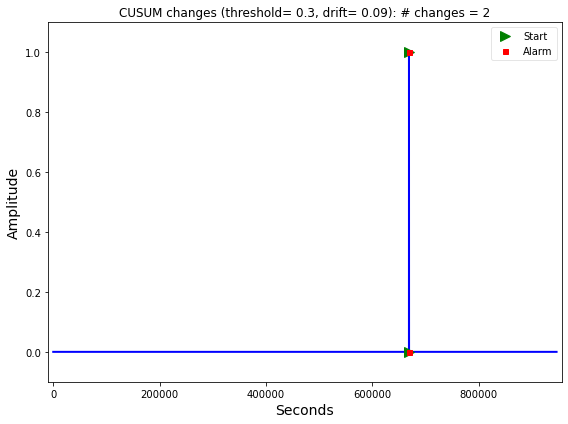

change start indices [669067 669122]
----------------------------------- DPIT301 -----------------------------------


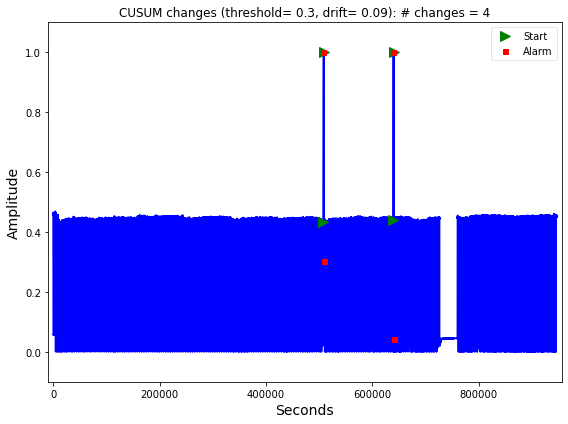

change start indices [508183 509153 639725 640409]
----------------------------------- FIT301 -----------------------------------


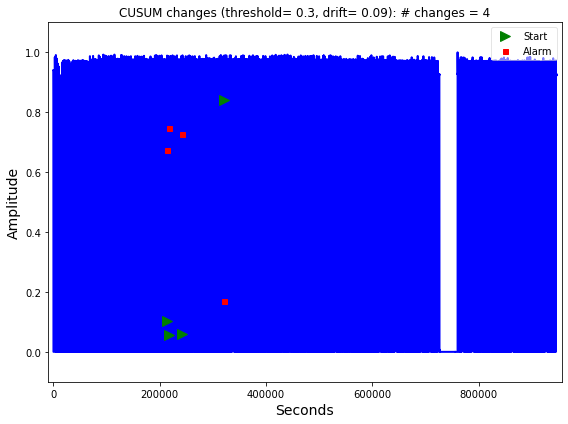

change start indices [214123 218303 243070 321180]
----------------------------------- LIT301 -----------------------------------


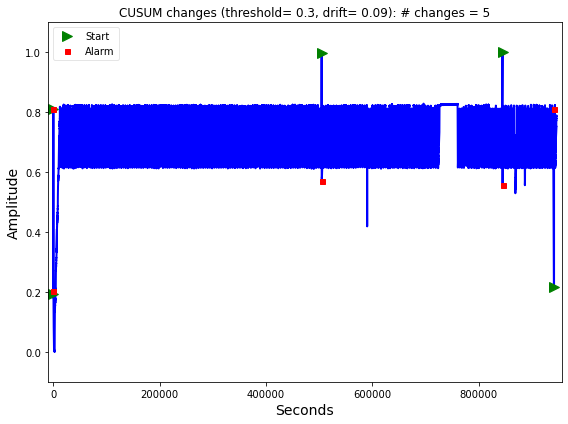

change start indices [   210    265 504911 845113 941989]
----------------------------------- MV301 -----------------------------------


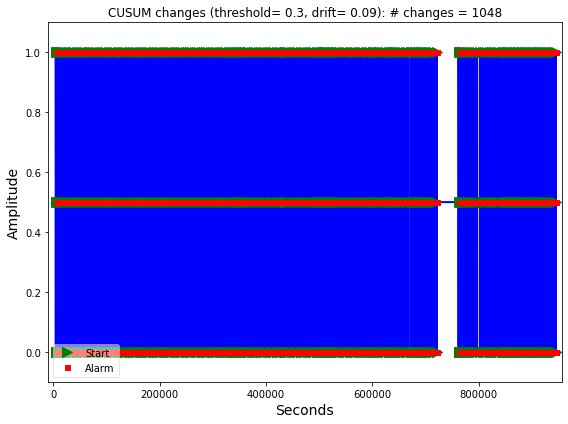

change start indices [  4777   4784   4819 ... 945426 945461 945467]
----------------------------------- MV302 -----------------------------------


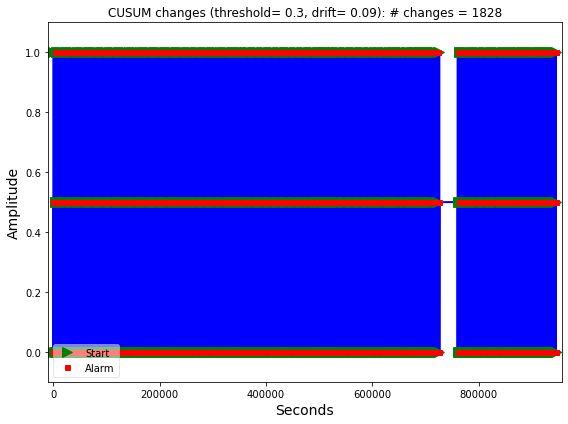

change start indices [   193    200   2964 ... 945417 945555 945561]
----------------------------------- MV303 -----------------------------------


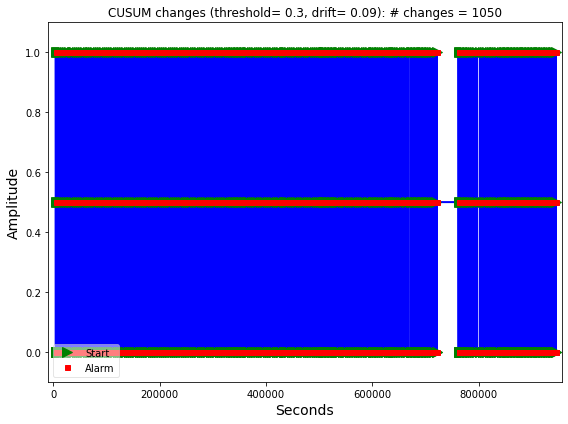

change start indices [  4777   4785   4883 ... 945427 945523 945531]
----------------------------------- MV304 -----------------------------------


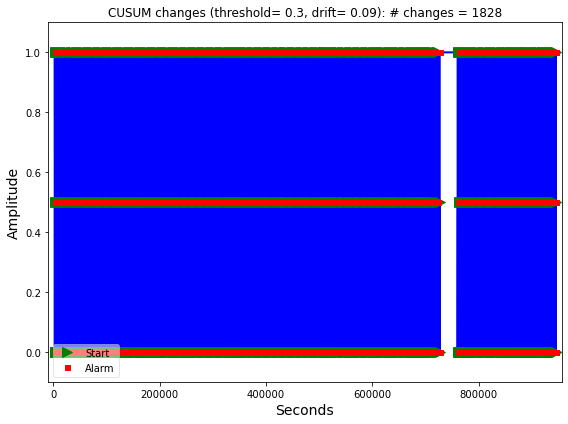

change start indices [  2923   2931   2972 ... 945476 945563 945570]
----------------------------------- P301 -----------------------------------


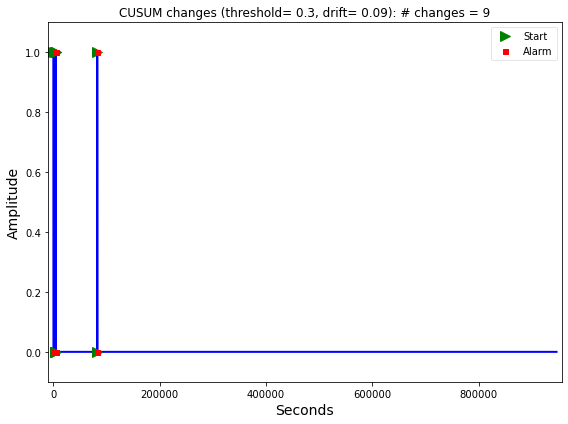

change start indices [  191  2931  3559  3630  4767  4887  4890 82755 82766]
----------------------------------- P302 -----------------------------------


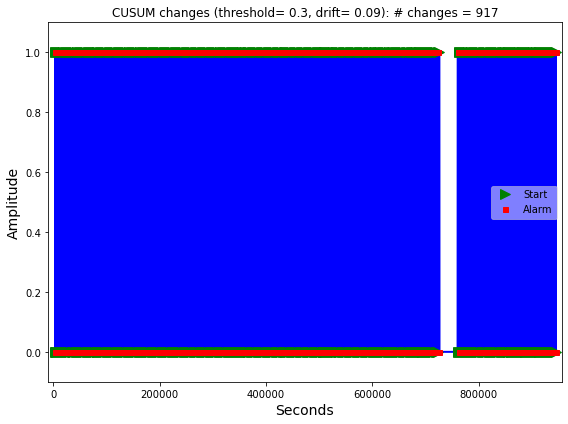

change start indices [  3559   3630   4882   4887   4890   6687   6802   8607   8721  10526
  10641  12447  12561  14367  14481  16288  16401  18208  18321  19223
  19858  21688  21802  23425  24060  25889  26001  27647  28286  30089
  30203  31835  32464  34289  34402  36210  36322  37178  37808  39629
  39743  41372  42007  43830  43943  45587  46225  48031  48144  49788
  50422  52230  52344  53959  54595  56431  56544  58082  58719  60511
  60626  62209  62847  64652  64767  66374  67013  68852  68967  70772
  70886  72314  72945  74792  74906  76486  77120  78934  79046  80751
  81384  82755  82766  83193  83307  85049  85682  87514  87629  89245
  89872  91715  91829  93435  94071  95915  96027  97642  98276 100115
 100228 101859 102495 104315 104429 106060 106691 108515 108629 110257
 110888 112716 112829 114443 115076 116916 117029 118606 119237 121056
 121170 122767 123397 125197 125309 126902 127532 129338 129450 131023
 131661 133478 133591 135186 135820 137618 137732 139296

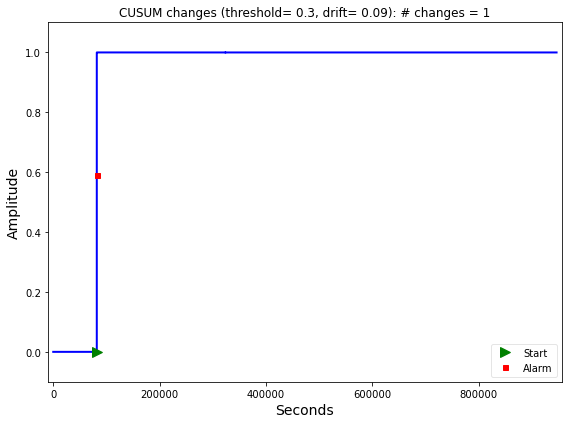

change start indices [81927]
----------------------------------- AIT402 -----------------------------------


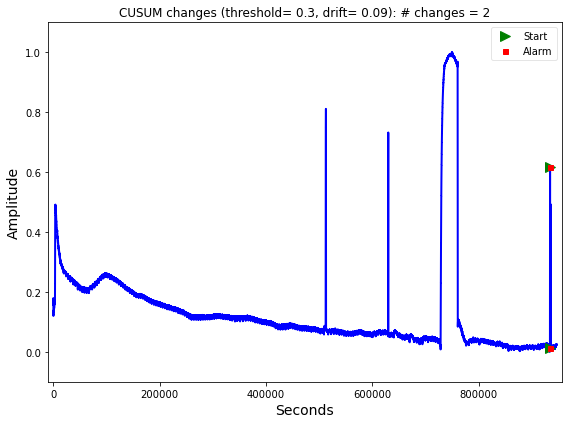

change start indices [934253 934532]
----------------------------------- FIT401 -----------------------------------


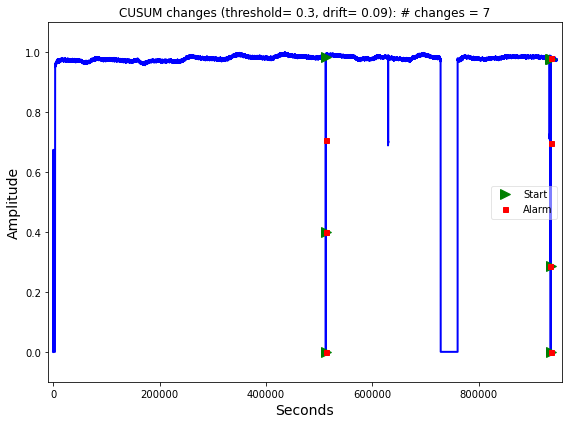

change start indices [512159 512320 512881 934982 935382 935457 935753]
----------------------------------- LIT401 -----------------------------------


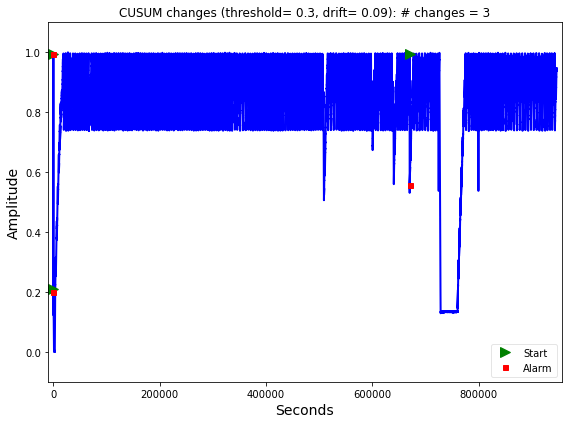

change start indices [   191    292 670297]
----------------------------------- P402 -----------------------------------


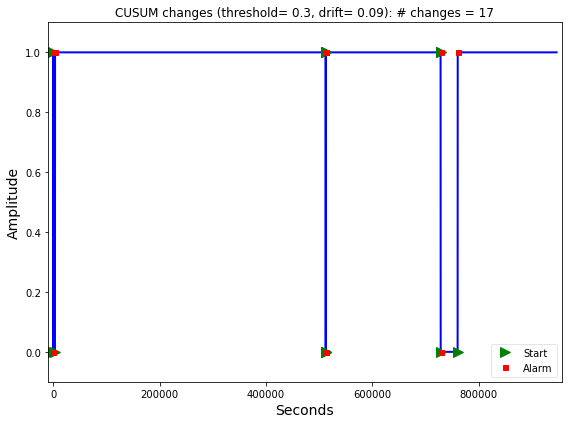

change start indices [   202    276   3259 512539 512540 512698 512699 512826 512827 512832
 512833 512838 512839 728554 728650 728654 760591]
----------------------------------- P403 -----------------------------------


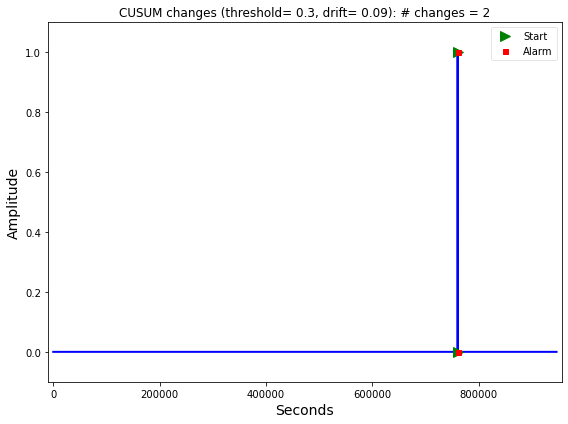

change start indices [760593 760653]
----------------------------------- UV401 -----------------------------------


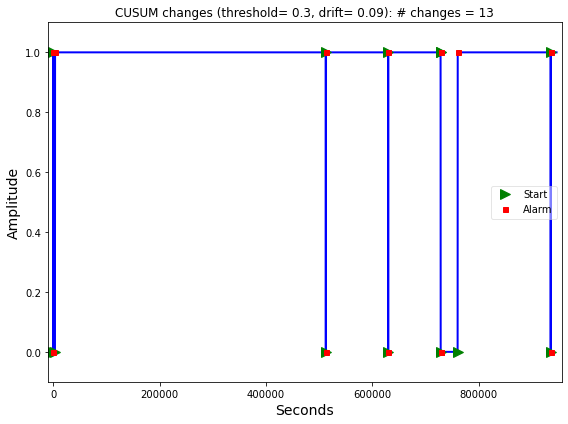

change start indices [   204    276   3262 512320 512882 629692 630160 728554 728652 728654
 760593 935458 935753]
----------------------------------- AIT501 -----------------------------------


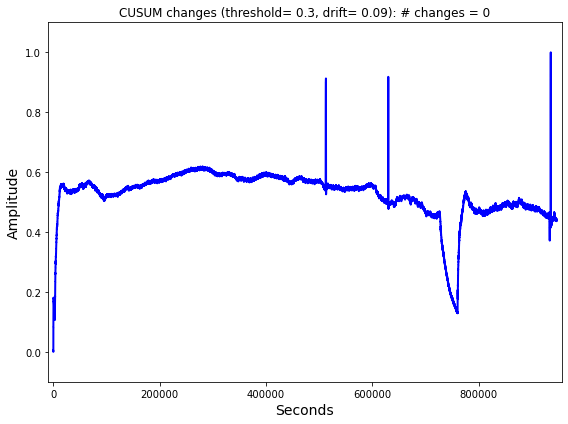

change start indices []
----------------------------------- AIT502 -----------------------------------


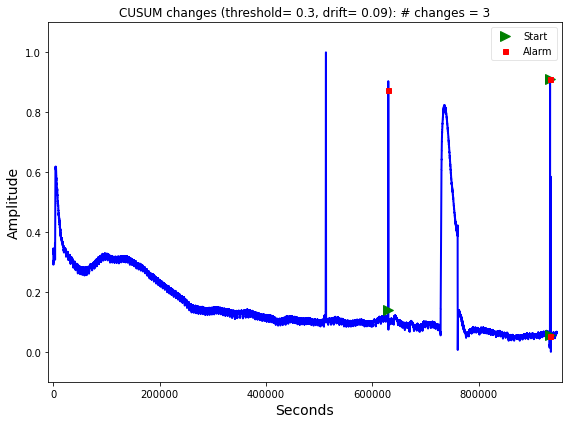

change start indices [630160 934253 934533]
----------------------------------- AIT503 -----------------------------------


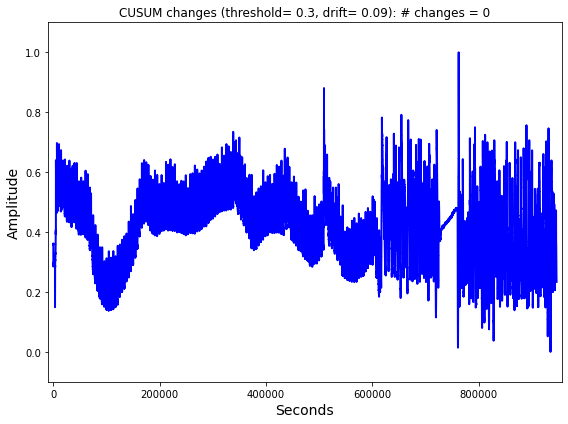

change start indices []
----------------------------------- AIT504 -----------------------------------


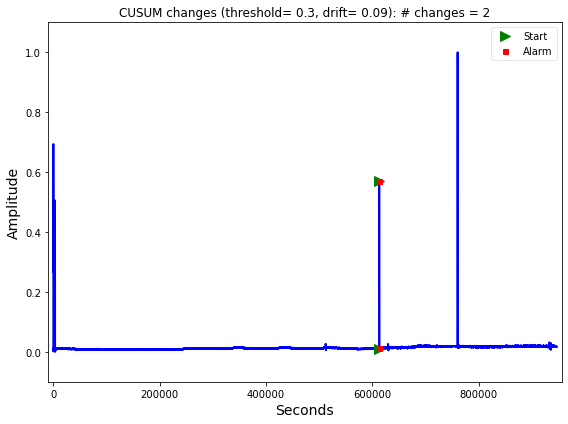

change start indices [612921 613313]
----------------------------------- FIT501 -----------------------------------


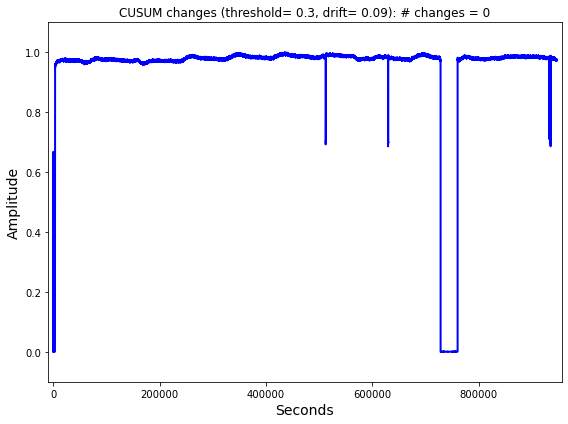

change start indices []
----------------------------------- FIT502 -----------------------------------


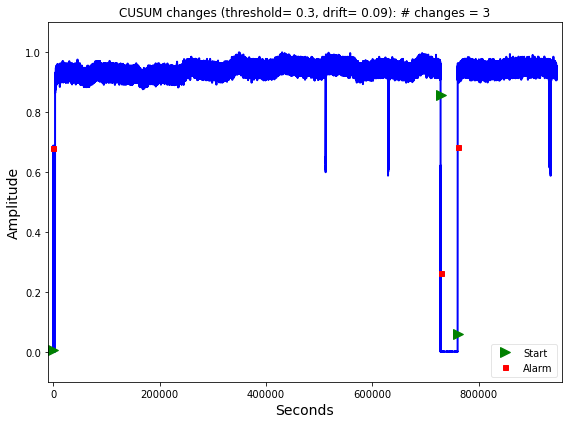

change start indices [   204 728557 760593]
----------------------------------- FIT503 -----------------------------------


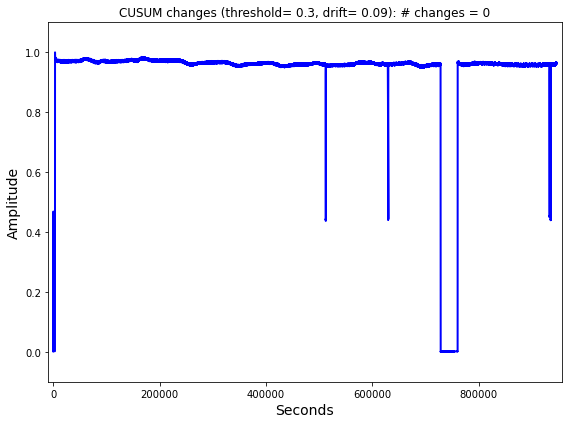

change start indices []
----------------------------------- FIT504 -----------------------------------


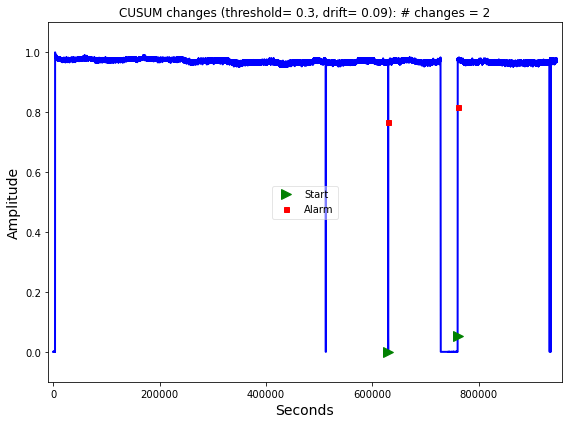

change start indices [630166 760599]
----------------------------------- P501 -----------------------------------


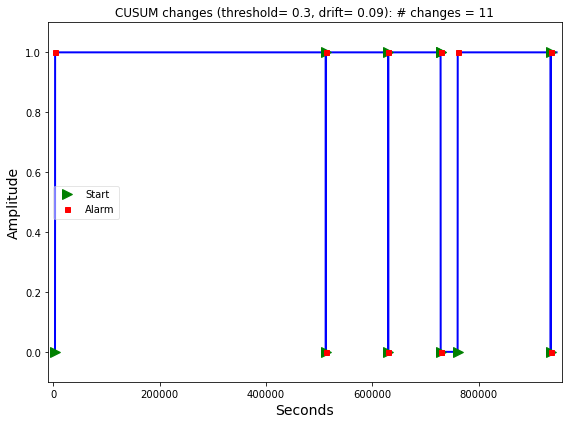

change start indices [  3337 512322 512882 629694 630160 728555 728652 728655 760593 935458
 935753]
----------------------------------- PIT501 -----------------------------------


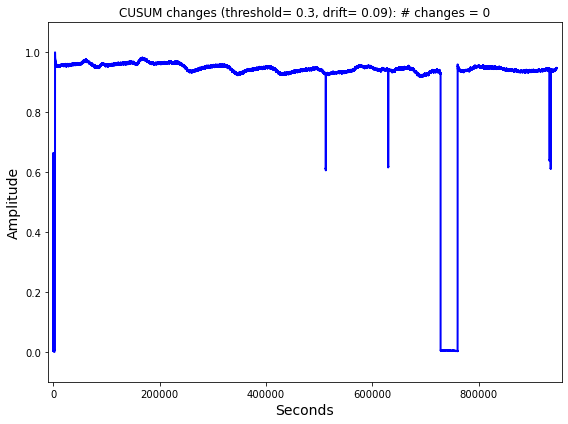

change start indices []
----------------------------------- PIT502 -----------------------------------


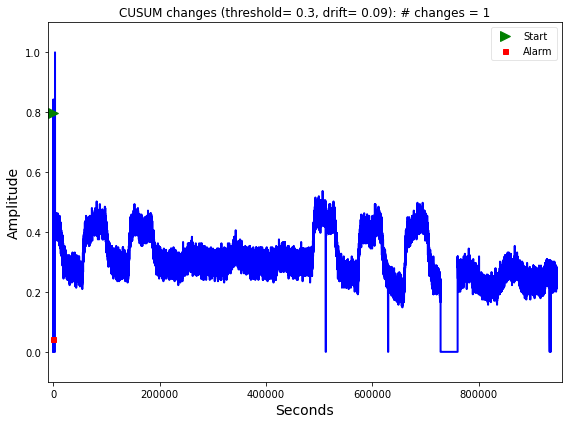

change start indices [277]
----------------------------------- PIT503 -----------------------------------


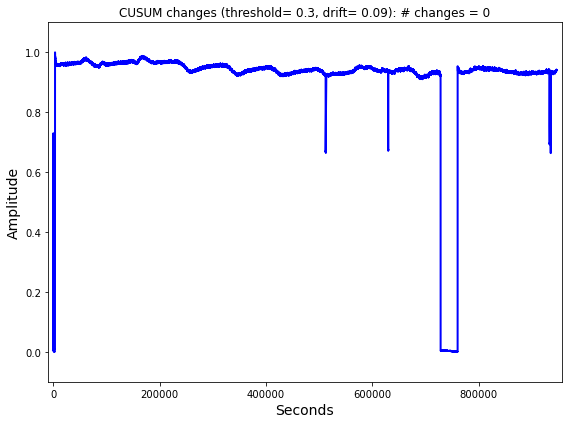

change start indices []
----------------------------------- FIT601 -----------------------------------


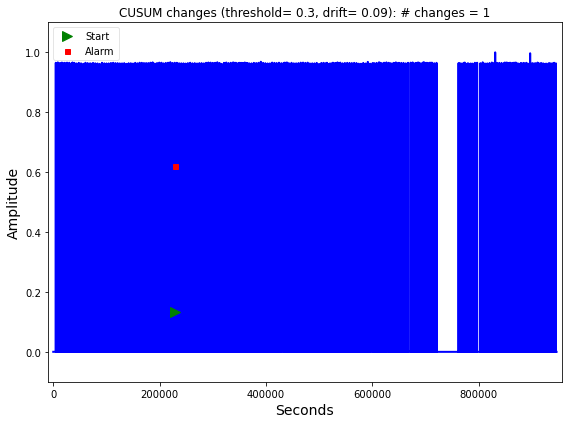

change start indices [228431]
----------------------------------- P602 -----------------------------------


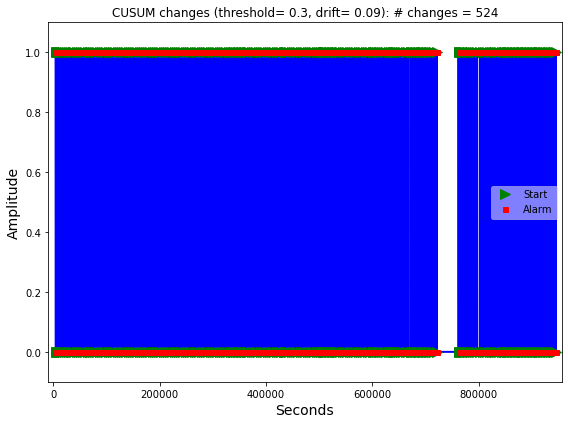

change start indices [  4785   4817   6706   6737   8626   8657  10547  10576  12466  12497
  14387  14418  16307  16337  18227  18258  21707  21738  25908  25938
  30107  30139  34308  34339  36228  36259  39649  39679  43849  43879
  48049  48080  52250  52280  56450  56481  60531  60562  64671  64702
  68872  68902  70791  70822  74812  74842  78952  78983  83212  83243
  87533  87564  91733  91764  95934  95964 100134 100165 104334 104365
 108535 108565 112735 112766 116935 116965 121076 121106 125216 125246
 129356 129386 133497 133528 137637 137668 141778 141808 145918 145949
 149998 150028 154138 154170 158279 158310 162420 162450 166560 166591
 170640 170670 174660 174691 178680 178711 182821 182853 186961 186991
 191101 191132 195242 195273 199443 199474 203583 203614 207723 207754
 211804 211834 215944 215976 220144 220175 224285 224316 228426 228456
 232565 232596 236645 236677 240787 240817 244926 244957 249067 249097
 253267 253298 257528 257558 261849 261879 266169 266200

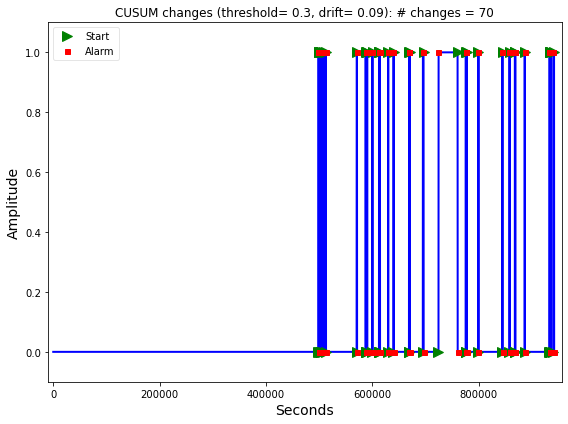

change start indices [498552 499492 499866 500309 501718 502101 503257 503647 504053 504249
 504503 504932 508208 509172 512178 512899 570598 571319 587483 587716
 588938 589369 590243 590519 599890 600607 612641 612900 612941 613336
 613798 614519 629716 630179 639752 640449 669066 669387 669708 670320
 695094 696539 724626 760526 775918 776039 776858 778029 799451 799818
 844477 845078 857989 858433 868277 868378 868653 869134 886478 887018
 933339 933808 934215 934496 934945 935346 935419 935716 940299 941989]


In [21]:
#DF4, normalized data
for j in range(df4.shape[1]):
    detect_cusum(x=(df4.iloc[:,j].values))

In [22]:
#Start times of CUSUM detected change for each variable
for i in range(len(tai_list)):
    print(str(df4.columns[i]), tai_list[i])

FIT101 []
LIT101 [   222    240 777983 858472 886544 887060]
MV101 [   211    219   2400   2409  15581  15588  16456  16465  19665  19673
  21026  21034  24034  24042  25218  25227  28253  28262  29448  29457
  32441  32449  33639  33648  36354  36362  37034  37043  38163  38171
  38970  38978  41977  41986  43169  43177  46192  46200  47389  47397
  50395  50403  51577  51584  54559  54567  55756  55764  58686  58695
  59872  59881  62820  62828  64013  64023  66980  66988  68244  68252
  72490  72498  74106  74115  77098  77106  78283  78290  81354  81362
  82552  82560  85639  85648  86840  86848  89854  89862  91027  91036
  94036  94045  95230  95238  98254  98262  99441  99449 102468 102476
 103649 103657 106675 106684 107851 107859 110870 110878 112059 112068
 115067 115075 116234 116242 119222 119231 120402 120410 123391 123400
 124559 124567 127520 127529 128686 128694 131650 131658 132822 132832
 135802 135811 136980 136988 139917 139925 141088 141096 144046 144054
 145222 14

### SWaT2015 CUSUM and K-means time matching

In [23]:
df7 = pd.read_csv("Case_0_SWaT2015_P1_clusters.csv")# change to 2015 data
df7.head()

,Unnamed: 0,Timestamp,FIT101,LIT101,MV101,P101,P102,Normal_Attack,clusters,outlier
0,0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,0,1,True
1,1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,0,1,True
2,2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,0,1,True
3,3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,0,1,True
4,4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,0,1,True


In [24]:
# convert df7 True's to second indexes
a = []
for i in range(len(df)):
    if df7["outlier"][i]==True:
        a.append(df7.iloc[i,0])
    else:
        pass

print(" Time indices of K-Means:")
print(a)
print("\n len(a)", len(a))

 Time indices of K-Means:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

In [28]:
#Matching seconds indicies of K-means to second indicies of CUSUM.
#Then converted seconds to time

matched_list = []
for i in range(len(tai_list)):
    matched=np.array([[]],dtype=int)
    for j in range(len(tai_list[i])):
        if np.in1d(tai_list[i], a)[j]==True:
            matched = np.append(matched, tai_list[i][j])#seconds
#             matched = np.append(matched, ((tai_list[i][j])/60)/60+12.5833-12)#time
    matched_list.append(matched)
    print

print("Matched CUSUM and K-Means Times:")
for k in range(len(matched_list)):
    print(str(df4.columns[k]),matched_list[k])
    
#Correct Detected Variables for SWaT2015
SWaT2015_var = ['AIT202','AIT402','AIT502','AIT504','DIT301','DPIT301','FIT401','FIT502',\
                'LIT101','LIT301','LIT401','MV101','MV201','MV302','MV303','MV304','MV501',\
                'MV504','P101','P102','P201','P203','P205','P301','P302','P401','P501',\
                'P601','P602', 'UV401']

matched_variables = []
for m in range(len(matched_list)):
    if matched_list[m].any():
        matched_variables.append(df4.columns[m])
# print("\n\n Matched Variables: \n", matched_variables)
    
correct_SWaT2015_var=[]
for n in range(len(SWaT2015_var)):
    if SWaT2015_var[n] in matched_variables:
        correct_SWaT2015_var.append(SWaT2015_var[n])#seconds
#     detected_variables.append(detected)
    
print("\n\n Correct Detected Variables: \n", correct_SWaT2015_var)

#Variable Accuracy
TP = len(correct_SWaT2015_var)
FN = len(SWaT2015_var) - TP
FP = len(matched_variables)-len(correct_SWaT2015_var)
TN = (len(df4.columns)-2) - (TP+FN+FP) #minus 2, since "Seconds" and "Normal/Attack" columns are not variables
Acc = (TP+TN)/(TP+TN+FP+FN)

print("\n\nTP", TP)
print("FN", FN)
print("FP", FP)
print("TN", TN)

print("\n\n Variable Detection Accuracy:", Acc*100)

Matched CUSUM and K-Means Times:
FIT101 []
LIT101 [222 240]
MV101 [   211    219   2400   2409  15588  16465  19673  21034  24042  25227
  28262  29457  32449  33648  36362  37043  38171  38978  41986  43177
  46200  47397  50403  51584  54567  55764  58695  59881  62828  64023
  66988  68252  72498  74115  77106  78290  81362  82560  85648  86848
  89862  91036  94045  95238  98262  99449 102476 103657 106684 107859
 110878 112068 115075 116242 119231 120410 123400 124567 127529 128694
 131658 132832 135811 136988 139925 141096 144054 145231 148154 149324
 152276 153450 156434 157611 160602 161781 164734 165914 168770 169931
 172809 173981 176864 178029 180966 182142 185102 186282 189279 190466
 193428 194600 197566 198741 201724 202894 205858 207040 209983 211148
 214100 215283 218277 219465 222443 223624 226575 227742 230691 231872
 234818 235988 238940 240111 243061 244237 247236 248415 251451 252626
 255703 256874 260003 261202 264320 265507 268618 269807 272905 274104
 277181 278